# Kaggle Challenge: Spaceship Titanic
## Challenge Link: https://www.kaggle.com/competitions/spaceship-titanic
## Best Score I got: 0.74093

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
trainData = pd.read_csv("/home/emanueloliveira/Kaggle Challenges/Spaceship Titanic/spaceship-titanic/train.csv")

In [3]:
trainData.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
dataCopy = trainData.copy()

In [5]:
transpData = dataCopy['Transported']

In [6]:
dataCopy

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
transpData = transpData.astype(int)

In [8]:
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Creating 'PassengerGroup' and 'PassengerNum' Features

In [9]:
# Separating groups and passanger nums
groups = []
nums = []
for i in dataCopy['PassengerId'].str.split('_'):
    groups.append(int(i[0]))
    nums.append(int(i[1]))
dataCopy['PassengerGroup'] = pd.Series(groups)
dataCopy['PassengerNum'] = pd.Series(nums)

# Creating Features 'CabinDeck', 'CabinNum' and 'CabinSide'

In [10]:
print(dataCopy['Cabin'].str.split('/'))

0          [B, 0, P]
1          [F, 0, S]
2          [A, 0, S]
3          [A, 0, S]
4          [F, 1, S]
            ...     
8688      [A, 98, P]
8689    [G, 1499, S]
8690    [G, 1500, S]
8691     [E, 608, S]
8692     [E, 608, S]
Name: Cabin, Length: 8693, dtype: object


In [11]:
# Separating decks, nums and side of the cabins
deck = []
num = []
side = []
for i in dataCopy['Cabin'].str.split('/'):
    try:
        deck.append(i[0])
        num.append(int(i[1]))
        side.append(i[2])
    except:
        deck.append(float("NaN"))
        num.append(float("NaN"))
        side.append(float("NaN"))

In [12]:
dataCopy['CabinDeck'] = deck
dataCopy['CabinNum'] = num
dataCopy["CabinSide"] = side

# Looking for Correlations with Numerical Features

[[<AxesSubplot: xlabel='RoomService', ylabel='RoomService'>
  <AxesSubplot: xlabel='FoodCourt', ylabel='RoomService'>
  <AxesSubplot: xlabel='ShoppingMall', ylabel='RoomService'>
  <AxesSubplot: xlabel='Spa', ylabel='RoomService'>
  <AxesSubplot: xlabel='VRDeck', ylabel='RoomService'>]
 [<AxesSubplot: xlabel='RoomService', ylabel='FoodCourt'>
  <AxesSubplot: xlabel='FoodCourt', ylabel='FoodCourt'>
  <AxesSubplot: xlabel='ShoppingMall', ylabel='FoodCourt'>
  <AxesSubplot: xlabel='Spa', ylabel='FoodCourt'>
  <AxesSubplot: xlabel='VRDeck', ylabel='FoodCourt'>]
 [<AxesSubplot: xlabel='RoomService', ylabel='ShoppingMall'>
  <AxesSubplot: xlabel='FoodCourt', ylabel='ShoppingMall'>
  <AxesSubplot: xlabel='ShoppingMall', ylabel='ShoppingMall'>
  <AxesSubplot: xlabel='Spa', ylabel='ShoppingMall'>
  <AxesSubplot: xlabel='VRDeck', ylabel='ShoppingMall'>]
 [<AxesSubplot: xlabel='RoomService', ylabel='Spa'>
  <AxesSubplot: xlabel='FoodCourt', ylabel='Spa'>
  <AxesSubplot: xlabel='ShoppingMall', yla

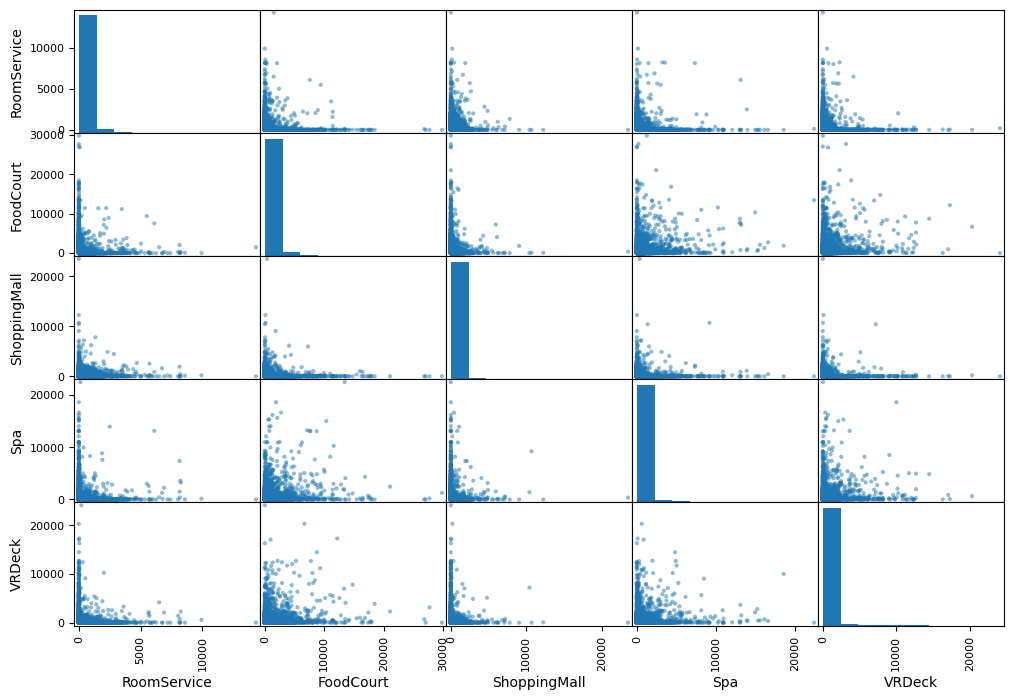

In [13]:
from pandas.plotting import scatter_matrix

attributes = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
print(scatter_matrix(dataCopy[attributes], figsize=(12, 8)))

In [14]:
corr_matrix = dataCopy.corr()
corr_matrix["Transported"].sort_values(ascending=True)
# "RoomService", "Spa", "VRDeck"

/tmp/ipykernel_48670/1087820707.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataCopy.corr()


RoomService      -0.244611
Spa              -0.221131
VRDeck           -0.207075
Age              -0.075026
CabinNum         -0.045097
ShoppingMall      0.010141
PassengerGroup    0.021491
FoodCourt         0.046566
PassengerNum      0.066390
Transported       1.000000
Name: Transported, dtype: float64

In [15]:
# Summing "RoomService", "Spa" and "VRDeck" features
dataCopy["RSVExpenses"] = dataCopy["RoomService"] + dataCopy["Spa"] + dataCopy["VRDeck"]

# Creating Feature 'TotalExpenses'
dataCopy['TotalExpenses'] = dataCopy['RoomService'] + dataCopy['FoodCourt'] + dataCopy['ShoppingMall'] + dataCopy['Spa'] + dataCopy['VRDeck']

corr_matrix = dataCopy.corr()
corr_matrix["Transported"].sort_values(ascending=True)

/tmp/ipykernel_48670/972787760.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataCopy.corr()


RSVExpenses      -0.356140
RoomService      -0.244611
Spa              -0.221131
VRDeck           -0.207075
TotalExpenses    -0.197671
Age              -0.075026
CabinNum         -0.045097
ShoppingMall      0.010141
PassengerGroup    0.021491
FoodCourt         0.046566
PassengerNum      0.066390
Transported       1.000000
Name: Transported, dtype: float64

In [16]:
# gráficos de dados numéricos
def plotgraph(X):
    plt.figure(figsize=(5, 3))
    plt.scatter(X, transpData)
    plt.xlabel(f'{X.name}')
    plt.ylabel('Transported')
    plt.show()

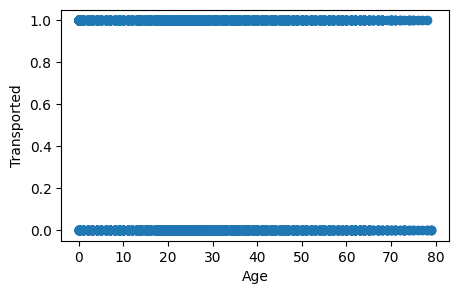

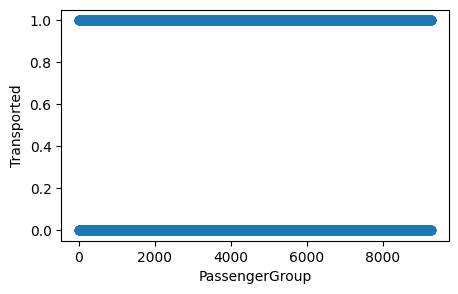

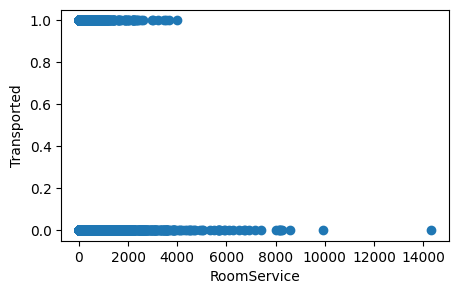

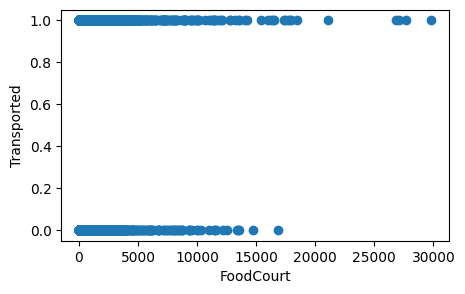

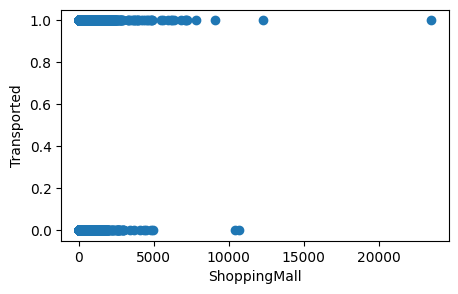

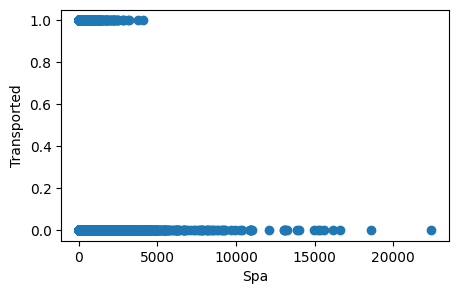

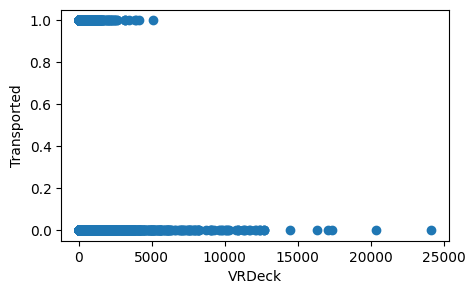

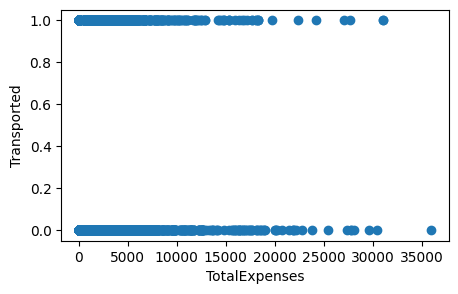

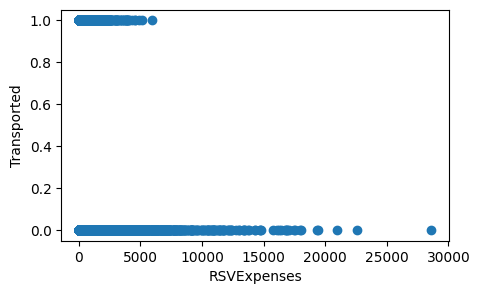

In [17]:
plotgraph(dataCopy['Age']) # No correlation
plotgraph(dataCopy["PassengerGroup"]) #  No correlation
plotgraph(dataCopy['RoomService'])
plotgraph(dataCopy['FoodCourt'])
plotgraph(dataCopy['ShoppingMall'])
plotgraph(dataCopy['Spa'])
plotgraph(dataCopy['VRDeck'])
plotgraph(dataCopy['TotalExpenses'])
plotgraph(dataCopy["RSVExpenses"])

In [18]:
# Tabela com dados numéricos
def plotNumTable(data):
    treshold = data.mean()
    TH = 0; TL = 0; FH = 0; FL = 0
    for i in range(len(transpData)):
        if transpData[i] == 1 and data[i] > treshold:
            TH += 1
        elif transpData[i] == 1 and data[i] <= treshold:
            TL += 1
        elif transpData[i] == 0 and data[i] > treshold:
            FH += 1
        elif transpData[i] == 0 and data[i] <= treshold:
            FL += 1
    plt.title(f"{data.name}")
    plt.table(cellText=([TH, FH], [TL, FL]), rowLabels=["Higer", "Lower"], 
              colLabels=(["Transported", "Not Transported"]), loc='center')
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.box(on=None)
    plt.show()

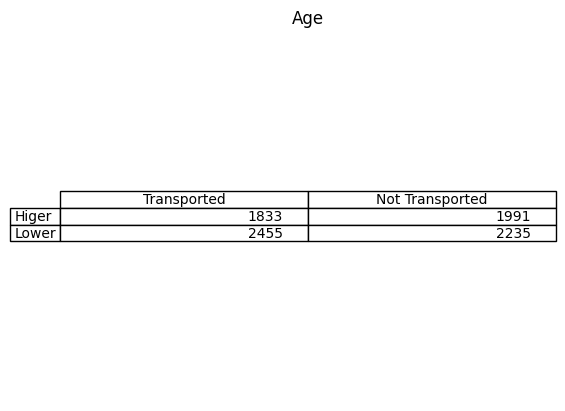

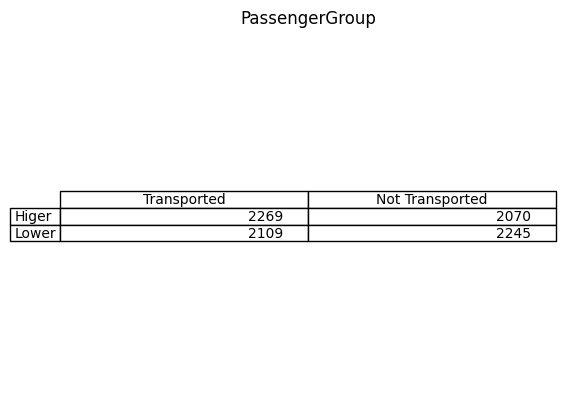

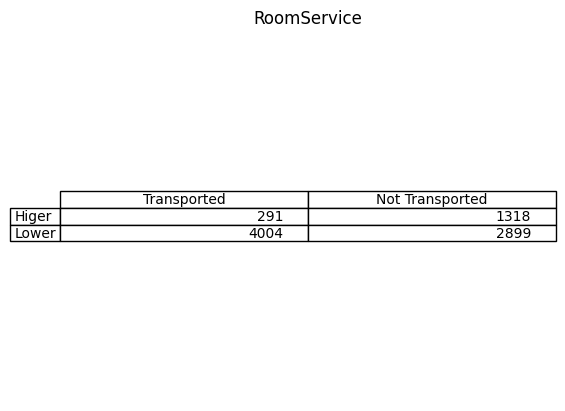

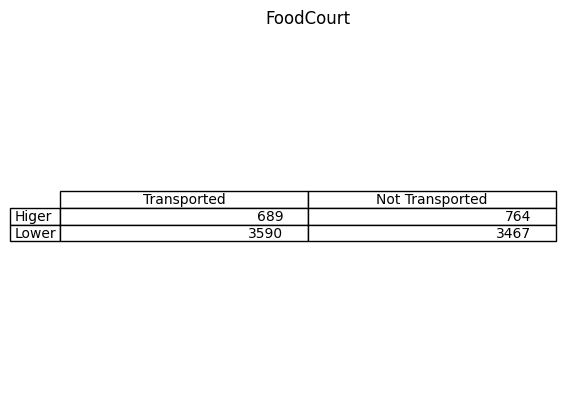

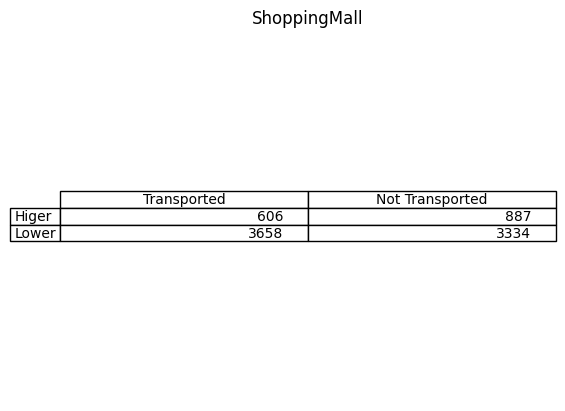

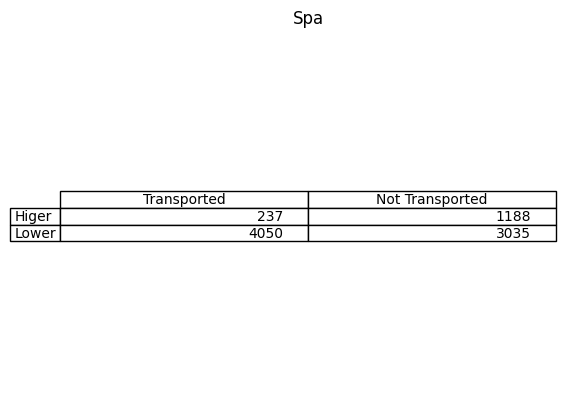

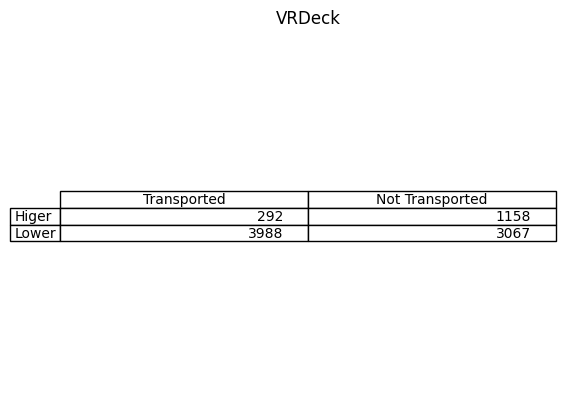

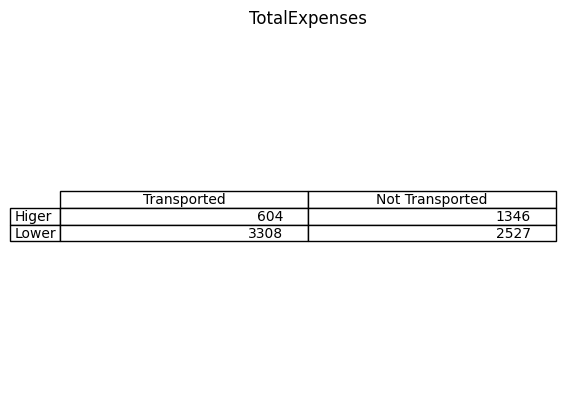

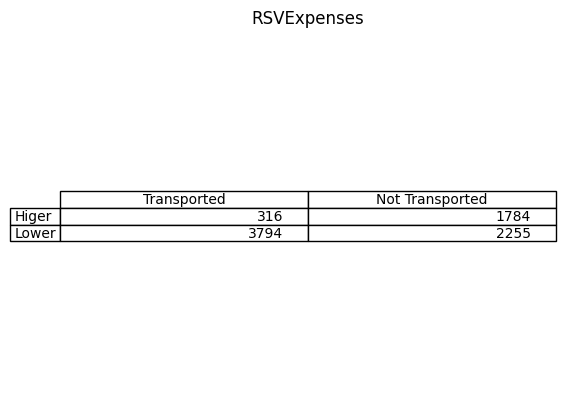

In [19]:
plotNumTable(dataCopy['Age']) # No correlation
plotNumTable(dataCopy["PassengerGroup"]) #  No correlation
plotNumTable(dataCopy['RoomService'])
plotNumTable(dataCopy['FoodCourt'])
plotNumTable(dataCopy['ShoppingMall'])
plotNumTable(dataCopy['Spa'])
plotNumTable(dataCopy['VRDeck'])
plotNumTable(dataCopy['TotalExpenses'])
plotNumTable(dataCopy['RSVExpenses'])

# Looking For Correlations in Categorical Data

## Analyzing Cabin Features

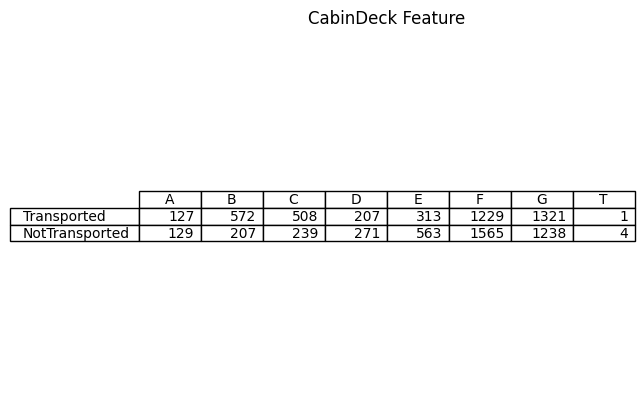

In [20]:
# CabinDeck Feature 

A = 0; B = 0; C = 0; D = 0; E = 0; F = 0; G = 0; T = 0
NA = 0; NB = 0; NC = 0; ND = 0; NE = 0; NF = 0; NG = 0; NT = 0
for i in range(len(transpData)):
    if transpData[i] == 1:
        if dataCopy['CabinDeck'][i] == 'A':
            A += 1
        elif dataCopy['CabinDeck'][i] == 'B':
            B += 1
        elif dataCopy['CabinDeck'][i] == 'C':
            C += 1
        elif dataCopy['CabinDeck'][i] == 'D':
            D += 1
        elif dataCopy['CabinDeck'][i] == 'E':
            E += 1
        elif dataCopy['CabinDeck'][i] == 'F':
            F += 1
        elif dataCopy['CabinDeck'][i] == 'G':
            G += 1
        elif dataCopy['CabinDeck'][i] == 'T':
            T += 1
    else:
        if dataCopy['CabinDeck'][i] == 'A':
            NA += 1
        elif dataCopy['CabinDeck'][i] == 'B':
            NB += 1
        elif dataCopy['CabinDeck'][i] == 'C':
            NC += 1
        elif dataCopy['CabinDeck'][i] == 'D':
            ND += 1
        elif dataCopy['CabinDeck'][i] == 'E':
            NE += 1
        elif dataCopy['CabinDeck'][i] == 'F':
            NF += 1
        elif dataCopy['CabinDeck'][i] == 'G':
            NG += 1
        elif dataCopy['CabinDeck'][i] == 'T':
            NT += 1
        
plt.title('CabinDeck Feature')
plt.table(cellText=([[A, B, C, D, E, F, G, T], [NA, NB, NC, ND, NE, NF, NG, NT]]), rowLabels=["Transported", "NotTransported"], 
          colLabels=(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']), loc='center')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.show()

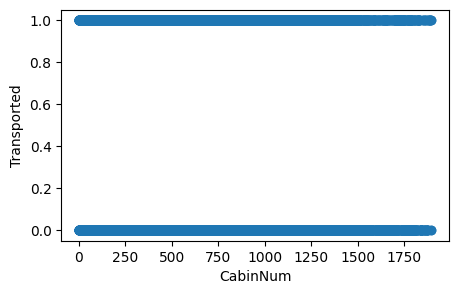

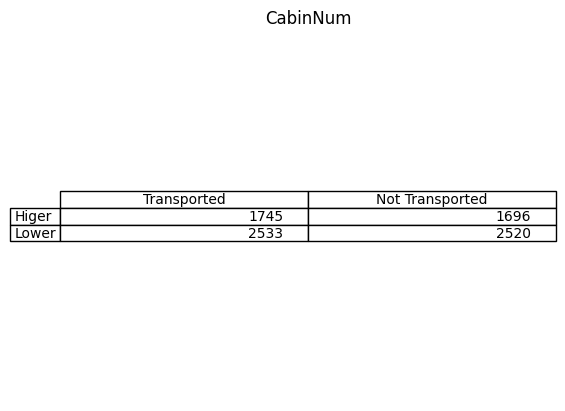

In [21]:
# CabinNum Feature

plotgraph(dataCopy['CabinNum'])
plotNumTable(dataCopy['CabinNum'])

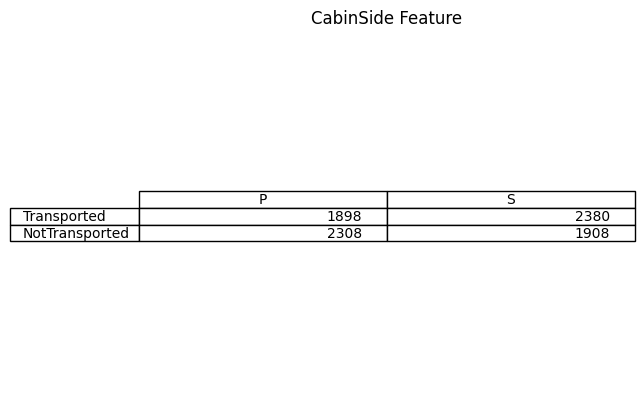

In [22]:
# CabinSide Feature 

P = 0; S = 0; NP = 0; NS = 0
for i in range(len(transpData)):
    if transpData[i] == 1:
        if dataCopy['CabinSide'][i] == 'P':
            P += 1
        elif dataCopy['CabinSide'][i] == 'S':
            S += 1
    else:
        if dataCopy['CabinSide'][i] == 'P':
            NP += 1
        elif dataCopy['CabinSide'][i] == 'S':
            NS += 1

plt.title('CabinSide Feature')
plt.table(cellText=([[P, S], [NP, NS]]), rowLabels=["Transported", "NotTransported"], 
          colLabels=(['P', 'S']), loc='center')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.show()

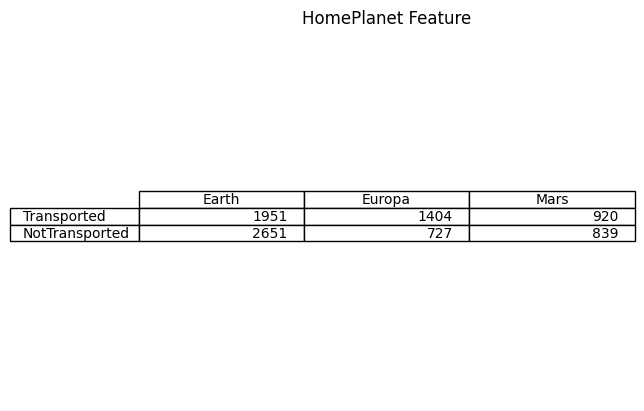

In [23]:
# HomePlanet Feature

Ert = 0; Eur = 0; Mar = 0
NErt = 0; NEur = 0; NMar = 0
for i in range(len(transpData)):
    if transpData[i] == 1:
        if dataCopy['HomePlanet'][i] == "Earth":
            Ert += 1
        elif dataCopy['HomePlanet'][i] == 'Europa':
            Eur += 1
        elif dataCopy['HomePlanet'][i] == "Mars":
            Mar += 1
    else:
        if dataCopy['HomePlanet'][i] == "Earth":
            NErt += 1
        elif dataCopy['HomePlanet'][i] == 'Europa':
            NEur += 1
        elif dataCopy['HomePlanet'][i] == "Mars":
            NMar += 1
    
plt.title('HomePlanet Feature')
plt.table(cellText=([[Ert, Eur, Mar], [NErt, NEur, NMar]]), rowLabels=["Transported", "NotTransported"], 
          colLabels=(['Earth', 'Europa', 'Mars']), loc='center')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.show()


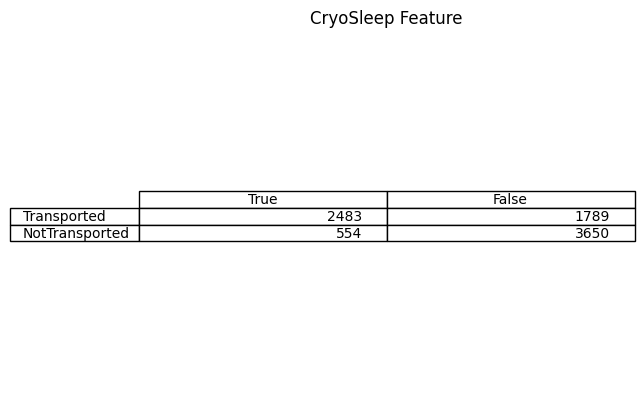

In [24]:
# CryoSleep Feature 

T = 0; F = 0; NT = 0; NF = 0
for i in range(len(transpData)):
    if transpData[i] == 1:
        if dataCopy['CryoSleep'][i] == True:
            T += 1
        elif dataCopy['CryoSleep'][i] == False:
            F += 1
    else:
        if dataCopy['CryoSleep'][i] == True:
            NT += 1
        elif dataCopy['CryoSleep'][i] == False:
            NF += 1

plt.title('CryoSleep Feature')
plt.table(cellText=([[T, F], [NT, NF]]), rowLabels=["Transported", "NotTransported"], 
          colLabels=(['True', 'False']), loc='center')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.show()

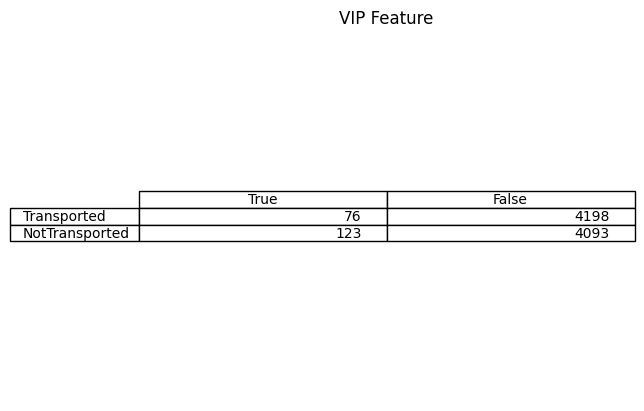

In [25]:
# VIP Feature 

T = 0; F = 0; NT = 0; NF = 0
for i in range(len(transpData)):
    if transpData[i] == 1:
        if dataCopy['VIP'][i] == True:
            T += 1
        elif dataCopy['VIP'][i] == False:
            F += 1
    else:
        if dataCopy['VIP'][i] == True:
            NT += 1
        elif dataCopy['VIP'][i] == False:
            NF += 1

plt.title('VIP Feature')
plt.table(cellText=([[T, F], [NT, NF]]), rowLabels=["Transported", "NotTransported"], 
          colLabels=(['True', 'False']), loc='center')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.show()

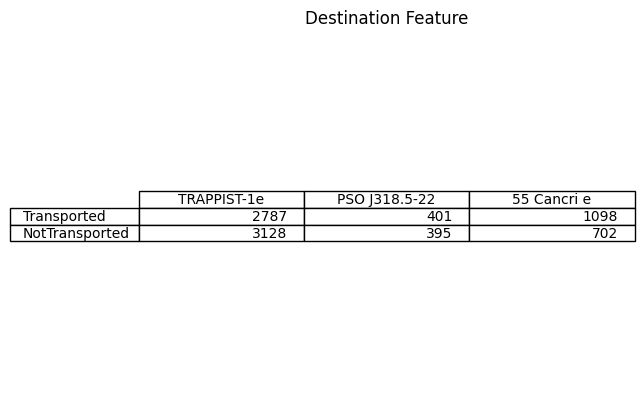

In [26]:
# Destination Feature
TRA = 0; PSO = 0; CAN = 0
NTRA = 0; NPSO = 0; NCAN = 0
for i in range(len(transpData)):
    if transpData[i] == 1:
        if dataCopy['Destination'][i] == "TRAPPIST-1e":
            TRA += 1
        elif dataCopy['Destination'][i] == "PSO J318.5-22":
            PSO += 1
        elif dataCopy['Destination'][i] == "55 Cancri e":
            CAN += 1
    else:
        if dataCopy['Destination'][i] == "TRAPPIST-1e":
            NTRA += 1
        elif dataCopy['Destination'][i] == "PSO J318.5-22":
            NPSO += 1
        elif dataCopy['Destination'][i] == "55 Cancri e":
            NCAN += 1

plt.title('Destination Feature')
plt.table(cellText=([[TRA, PSO, CAN], [NTRA, NPSO, NCAN]]), rowLabels=["Transported", "NotTransported"], 
          colLabels=(["TRAPPIST-1e", "PSO J318.5-22", "55 Cancri e"]), loc='center')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.show()


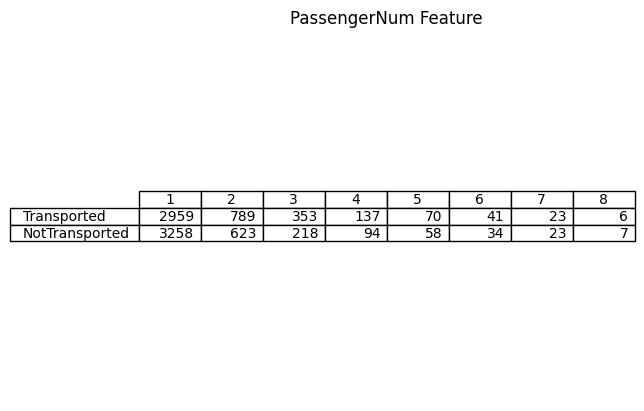

In [27]:
# Passenger Num

num1 = 0;  num2 = 0; num3 = 0; num4 = 0; num5 = 0; num6 = 0; num7 = 0; num8 = 0
Nnum1 = 0;  Nnum2 = 0; Nnum3 = 0; Nnum4 = 0; Nnum5 = 0; Nnum6 = 0; Nnum7 = 0; Nnum8 = 0
for i in range(len(transpData)):
    if transpData[i] == 1:
        if dataCopy["PassengerNum"][i] == 1:
            num1 += 1
        elif dataCopy["PassengerNum"][i] == 2:
            num2 += 1
        elif dataCopy["PassengerNum"][i] == 3:
            num3 += 1
        elif dataCopy["PassengerNum"][i] == 4:
            num4 += 1
        elif dataCopy["PassengerNum"][i] == 5:
            num5 += 1
        elif dataCopy["PassengerNum"][i] == 6:
            num6 += 1
        elif dataCopy["PassengerNum"][i] == 7:
            num7 += 1
        elif dataCopy["PassengerNum"][i] == 8:
            num8 += 1
    else:
        if dataCopy["PassengerNum"][i] == 1:
            Nnum1 += 1
        elif dataCopy["PassengerNum"][i] == 2:
            Nnum2 += 1
        elif dataCopy["PassengerNum"][i] == 3:
            Nnum3 += 1
        elif dataCopy["PassengerNum"][i] == 4:
            Nnum4 += 1
        elif dataCopy["PassengerNum"][i] == 5:
            Nnum5 += 1
        elif dataCopy["PassengerNum"][i] == 6:
            Nnum6 += 1
        elif dataCopy["PassengerNum"][i] == 7:
            Nnum7 += 1
        elif dataCopy["PassengerNum"][i] == 8:
            Nnum8 += 1
            
plt.title('PassengerNum Feature')
plt.table(cellText=([[num1, num2, num3, num4, num5, num6, num7, num8], 
                     [Nnum1, Nnum2, Nnum3, Nnum4, Nnum5, Nnum6, Nnum7, Nnum8]]), rowLabels=["Transported", "NotTransported"], 
          colLabels=(['1', '2', '3', '4', '5', '6', '7', '8']), loc='center')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.show()


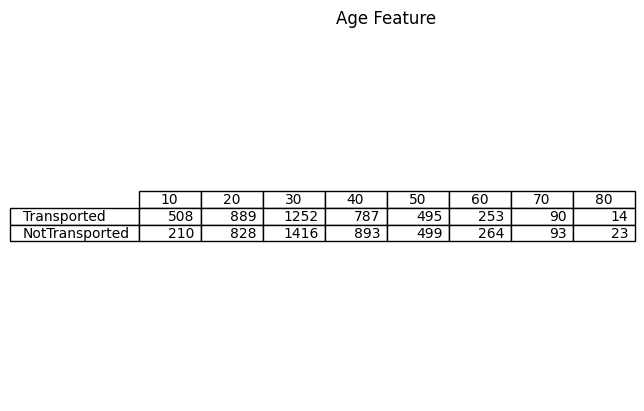

In [28]:
# Age as categorical

age10 = 0;  age20 = 0; age30 = 0; age40 = 0; age50 = 0; age60 = 0; age70 = 0; age80 = 0
Nage10 = 0;  Nage20 = 0; Nage30 = 0; Nage40 = 0; Nage50 = 0; Nage60 = 0; Nage70 = 0; Nage80 = 0
for i in range(len(transpData)):
    if transpData[i] == 1:
        if dataCopy["Age"][i] <= 10:
            age10 += 1
        elif dataCopy["Age"][i] <= 20:
            age20 += 1
        elif dataCopy["Age"][i] <= 30:
            age30 += 1
        elif dataCopy["Age"][i] <= 40:
            age40 += 1
        elif dataCopy["Age"][i] <= 50:
            age50 += 1
        elif dataCopy["Age"][i] <= 60:
            age60 += 1
        elif dataCopy["Age"][i] <= 70:
            age70 += 1
        elif dataCopy["Age"][i] <= 80:
            age80 += 1
    else:
        if dataCopy["Age"][i] <= 10:
            Nage10 += 1
        elif dataCopy["Age"][i] <= 20:
            Nage20 += 1
        elif dataCopy["Age"][i] <= 30:
            Nage30 += 1
        elif dataCopy["Age"][i] <= 40:
            Nage40 += 1
        elif dataCopy["Age"][i] <= 50:
            Nage50 += 1
        elif dataCopy["Age"][i] <= 60:
            Nage60 += 1
        elif dataCopy["Age"][i] <= 70:
            Nage70 += 1
        elif dataCopy["Age"][i] <= 80:
            Nage80 += 1
        
plt.title('Age Feature')
plt.table(cellText=([[age10, age20, age30, age40, age50, age60, age70, age80], 
                     [Nage10, Nage20, Nage30, Nage40, Nage50, Nage60, Nage70, Nage80]]), rowLabels=["Transported", "NotTransported"], 
          colLabels=(['10', '20', '30', '40', '50', '60', '70', '80']), loc='center')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.show()

# Features that seems relevant

In [29]:
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     8693 non-null   object 
 1   HomePlanet      8492 non-null   object 
 2   CryoSleep       8476 non-null   object 
 3   Cabin           8494 non-null   object 
 4   Destination     8511 non-null   object 
 5   Age             8514 non-null   float64
 6   VIP             8490 non-null   object 
 7   RoomService     8512 non-null   float64
 8   FoodCourt       8510 non-null   float64
 9   ShoppingMall    8485 non-null   float64
 10  Spa             8510 non-null   float64
 11  VRDeck          8505 non-null   float64
 12  Name            8493 non-null   object 
 13  Transported     8693 non-null   bool   
 14  PassengerGroup  8693 non-null   int64  
 15  PassengerNum    8693 non-null   int64  
 16  CabinDeck       8494 non-null   object 
 17  CabinNum        8494 non-null   f

### 'HomePlanet'
### 'CryoSleep'
### 'Destination'
### 'CabinDeck'
### 'CabinSide'
### 'RSVExpenses' 

# Missing Values

In [30]:
# Completing missing values of 'TotalExpenses' Feature with its mean value

dataCopy['RSVExpenses'] = dataCopy['RSVExpenses'].fillna(dataCopy['RSVExpenses'].mean())
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     8693 non-null   object 
 1   HomePlanet      8492 non-null   object 
 2   CryoSleep       8476 non-null   object 
 3   Cabin           8494 non-null   object 
 4   Destination     8511 non-null   object 
 5   Age             8514 non-null   float64
 6   VIP             8490 non-null   object 
 7   RoomService     8512 non-null   float64
 8   FoodCourt       8510 non-null   float64
 9   ShoppingMall    8485 non-null   float64
 10  Spa             8510 non-null   float64
 11  VRDeck          8505 non-null   float64
 12  Name            8493 non-null   object 
 13  Transported     8693 non-null   bool   
 14  PassengerGroup  8693 non-null   int64  
 15  PassengerNum    8693 non-null   int64  
 16  CabinDeck       8494 non-null   object 
 17  CabinNum        8494 non-null   f

# Text and Categorical Data

## "HomePlanet"

In [31]:
home_planet_data = dataCopy[['HomePlanet']].copy()

In [32]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
home_planet_encoder = ordinal_encoder.fit_transform(home_planet_data)
dataCopy['HomePlanet'] = home_planet_encoder

In [33]:
ordinal_encoder.categories_

[array(['Earth', 'Europa', 'Mars', nan], dtype=object)]

In [34]:
dataCopy.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,PassengerGroup,PassengerNum,CabinDeck,CabinNum,CabinSide,RSVExpenses,TotalExpenses
0,0001_01,1.0,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,1,1,B,0.0,P,0.0,0.0
1,0002_01,0.0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,2,1,F,0.0,S,702.0,736.0
2,0003_01,1.0,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,3,1,A,0.0,S,6807.0,10383.0
3,0003_02,1.0,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,3,2,A,0.0,S,3522.0,5176.0
4,0004_01,0.0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,4,1,F,1.0,S,870.0,1091.0


## "CabinDeck"

In [35]:
cabinDeck_data = dataCopy[['CabinDeck']].copy()

In [36]:
cabinDeck_encoder = ordinal_encoder.fit_transform(cabinDeck_data)
dataCopy['CabinDeck'] = cabinDeck_encoder

In [37]:
ordinal_encoder.categories_

[array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan], dtype=object)]

In [38]:
dataCopy.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,PassengerGroup,PassengerNum,CabinDeck,CabinNum,CabinSide,RSVExpenses,TotalExpenses
0,0001_01,1.0,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,1,1,1.0,0.0,P,0.0,0.0
1,0002_01,0.0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,2,1,5.0,0.0,S,702.0,736.0
2,0003_01,1.0,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,3,1,0.0,0.0,S,6807.0,10383.0
3,0003_02,1.0,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,3,2,0.0,0.0,S,3522.0,5176.0
4,0004_01,0.0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,4,1,5.0,1.0,S,870.0,1091.0


## "CabinSide"

In [39]:
cabinSide_data = dataCopy[['CabinSide']].copy()

In [40]:
cabinSide_encoder = ordinal_encoder.fit_transform(cabinSide_data)
dataCopy['CabinSide'] = cabinSide_encoder

In [41]:
ordinal_encoder.categories_

[array(['P', 'S', nan], dtype=object)]

In [42]:
dataCopy.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,PassengerGroup,PassengerNum,CabinDeck,CabinNum,CabinSide,RSVExpenses,TotalExpenses
0,0001_01,1.0,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,1,1,1.0,0.0,0.0,0.0,0.0
1,0002_01,0.0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,2,1,5.0,0.0,1.0,702.0,736.0
2,0003_01,1.0,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,3,1,0.0,0.0,1.0,6807.0,10383.0
3,0003_02,1.0,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,3,2,0.0,0.0,1.0,3522.0,5176.0
4,0004_01,0.0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,4,1,5.0,1.0,1.0,870.0,1091.0


## "Destination"

In [43]:
destination_data = dataCopy[['Destination']].copy()

In [44]:
destination_encoder = ordinal_encoder.fit_transform(destination_data)
dataCopy['Destination'] = destination_encoder

In [45]:
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     8693 non-null   object 
 1   HomePlanet      8492 non-null   float64
 2   CryoSleep       8476 non-null   object 
 3   Cabin           8494 non-null   object 
 4   Destination     8511 non-null   float64
 5   Age             8514 non-null   float64
 6   VIP             8490 non-null   object 
 7   RoomService     8512 non-null   float64
 8   FoodCourt       8510 non-null   float64
 9   ShoppingMall    8485 non-null   float64
 10  Spa             8510 non-null   float64
 11  VRDeck          8505 non-null   float64
 12  Name            8493 non-null   object 
 13  Transported     8693 non-null   bool   
 14  PassengerGroup  8693 non-null   int64  
 15  PassengerNum    8693 non-null   int64  
 16  CabinDeck       8494 non-null   float64
 17  CabinNum        8494 non-null   f

In [46]:
# Setting missing data from 'HomePlanet', 'CabinDeck', 'CabinSide' to -1

dataCopy['HomePlanet'] = dataCopy['HomePlanet'].fillna(-1)
dataCopy['CabinDeck'] = dataCopy['CabinDeck'].fillna(-1)
dataCopy['CabinSide'] = dataCopy['CabinSide'].fillna(-1)
dataCopy['CryoSleep'] = dataCopy['CryoSleep'].fillna(-1)
dataCopy['Destination'] = dataCopy['Destination'].fillna(-1)

## "CryoSleep"

In [47]:
dataCopy['CryoSleep'] = dataCopy['CryoSleep'].astype(int)
dataCopy.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,PassengerGroup,PassengerNum,CabinDeck,CabinNum,CabinSide,RSVExpenses,TotalExpenses
0,0001_01,1.0,0,B/0/P,2.0,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,1,1,1.0,0.0,0.0,0.0,0.0
1,0002_01,0.0,0,F/0/S,2.0,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,2,1,5.0,0.0,1.0,702.0,736.0
2,0003_01,1.0,0,A/0/S,2.0,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,3,1,0.0,0.0,1.0,6807.0,10383.0
3,0003_02,1.0,0,A/0/S,2.0,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,3,2,0.0,0.0,1.0,3522.0,5176.0
4,0004_01,0.0,0,F/1/S,2.0,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,4,1,5.0,1.0,1.0,870.0,1091.0


# Scalling 'RSVExpenses' Feature

<AxesSubplot: >

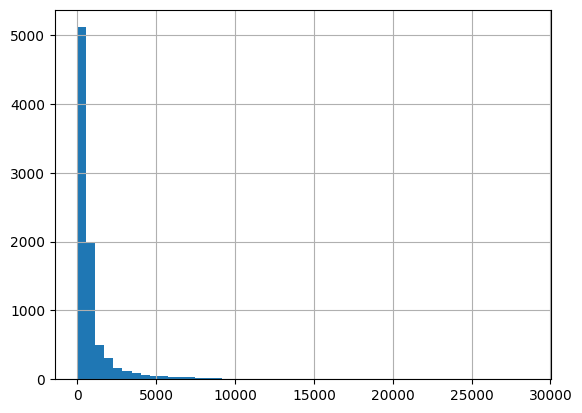

In [48]:
dataCopy['RSVExpenses'].hist(bins=50)

In [49]:
dataCopy['RSVExpenses'] = dataCopy['RSVExpenses']/dataCopy['RSVExpenses'].mean()

<AxesSubplot: >

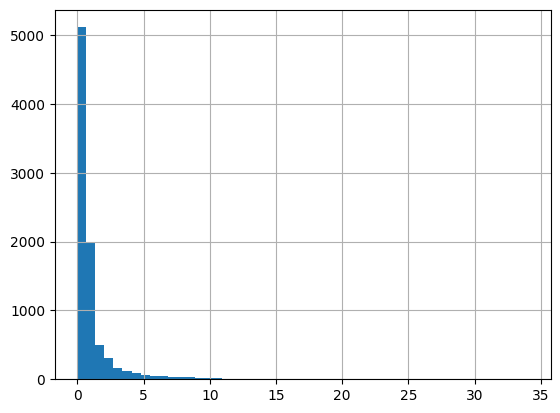

In [50]:
dataCopy['RSVExpenses'].hist(bins=50)

In [51]:
dataCopy.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,PassengerGroup,PassengerNum,CabinDeck,CabinNum,CabinSide,RSVExpenses,TotalExpenses
0,0001_01,1.0,0,B/0/P,2.0,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,1,1,1.0,0.0,0.0,0.000000,0.0
1,0002_01,0.0,0,F/0/S,2.0,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,2,1,5.0,0.0,1.0,0.835945,736.0
2,0003_01,1.0,0,A/0/S,2.0,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,3,1,0.0,0.0,1.0,8.105810,10383.0
3,0003_02,1.0,0,A/0/S,2.0,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,3,2,0.0,0.0,1.0,4.194015,5176.0
4,0004_01,0.0,0,F/1/S,2.0,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,4,1,5.0,1.0,1.0,1.036000,1091.0


# Training Models

In [52]:
features = dataCopy[['HomePlanet', 'CryoSleep', 'Destination', 'CabinDeck', 'CabinSide', 'RSVExpenses']]
labels = dataCopy['Transported'].astype(int)

## Preparing the test set

In [53]:
# Test set

testDF = pd.read_csv("/home/emanueloliveira/Kaggle Challenges/Spaceship Titanic/spaceship-titanic/test.csv")
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [54]:
# Creating 'TotalExpenses' feature and filling missing values with mean

testDF['RSVExpenses'] = testDF['RoomService'] + testDF['Spa'] + testDF['VRDeck']
testDF['RSVExpenses'] = testDF['RSVExpenses'].fillna(testDF['RSVExpenses'].mean())

In [55]:
# Creating 'CabinDeck' and 'CabinSide' features

deck = []
side = []
for i in testDF['Cabin'].str.split('/'):
    try:
        deck.append(i[0])
        side.append(i[2])
    except:
        deck.append(float("NaN"))
        side.append(float("NaN"))

testDF['CabinDeck'] = deck
testDF['CabinSide'] = side

In [56]:
# Categorical data 'HomePlanet', 'CabinDeck', 'Destination' and 'CabinSide' 

testDF['HomePlanet'] = ordinal_encoder.fit_transform(testDF[['HomePlanet']])
testDF['CabinDeck'] = ordinal_encoder.fit_transform(testDF[['CabinDeck']])
testDF['CabinSide'] = ordinal_encoder.fit_transform(testDF[['CabinSide']])
testDF['Destination'] = ordinal_encoder.fit_transform(testDF[['Destination']])

In [57]:
# missing categorical features
testDF['HomePlanet'] = testDF['HomePlanet'].fillna(-1)
testDF['CryoSleep'] = testDF['CryoSleep'].fillna(-1)
testDF['CabinDeck'] = testDF['CabinDeck'].fillna(-1)
testDF['CabinSide'] = testDF['CabinSide'].fillna(-1)
testDF['Destination'] = testDF['Destination'].fillna(-1)

In [58]:
# Test Features
testfeatures = testDF[['HomePlanet', 'CryoSleep', 'Destination', 'CabinDeck', 'CabinSide', 'RSVExpenses']]

# Selecting the model (Cross Validation)

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

featuresTrain, featuresTunn, labelsTrain, labelsTunn = train_test_split(features, labels, test_size=0.2, random_state=42)

In [60]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", round(scores.mean(), 5))
    print("Standard deviation:", round(scores.std(), 5))

In [61]:
from sklearn.metrics import accuracy_score

### Decision Tree

In [62]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, featuresTrain, labelsTrain, scoring="accuracy", cv=10)
tree_clf.fit(featuresTrain, labelsTrain)
tree_predictions = tree_clf.predict(featuresTunn)
accuracy_score(labelsTunn, tree_predictions)

0.7487061529614721

In [63]:
display_scores(tree_scores)

Scores: [0.73132184 0.73275862 0.72988506 0.77298851 0.77841727 0.74964029
 0.75539568 0.74964029 0.75683453 0.77266187]
Mean: 0.75295
Standard deviation: 0.017


### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_scores = cross_val_score(forest_clf, featuresTrain, labelsTrain, scoring="accuracy", cv=10)
forest_clf.fit(featuresTrain, labelsTrain)
forest_predictions = forest_clf.predict(featuresTunn)
accuracy_score(labelsTunn, forest_predictions)

0.7711328349626222

In [65]:
display_scores(forest_scores)

Scores: [0.74856322 0.74568966 0.7341954  0.78735632 0.78273381 0.75683453
 0.77266187 0.76115108 0.76546763 0.77985612]
Mean: 0.76345
Standard deviation: 0.01656


### SVC 'linear'

In [66]:
from sklearn.svm import SVC

svcl_clf = SVC(kernel='linear')
svcl_scores = cross_val_score(svcl_clf, featuresTrain, labelsTrain, scoring="accuracy", cv=10)
svcl_clf.fit(featuresTrain, labelsTrain)
svcl_predictions = svcl_clf.predict(featuresTunn)
accuracy_score(labelsTunn, svcl_predictions)

0.7671075330649799

In [67]:
display_scores(svcl_scores)

Scores: [0.74568966 0.75431034 0.76724138 0.77729885 0.77122302 0.77410072
 0.7942446  0.75971223 0.78129496 0.77841727]
Mean: 0.77035
Standard deviation: 0.01344


### SVC 'poly'

In [68]:
svcp_clf = SVC(kernel='poly')
svcp_scores = cross_val_score(svcp_clf, featuresTrain, labelsTrain, scoring="accuracy", cv=10)
svcp_clf.fit(featuresTrain, labelsTrain)
svcp_predictions = svcp_clf.predict(featuresTunn)
accuracy_score(labelsTunn, svcp_predictions)

0.7625071880391029

In [69]:
display_scores(svcp_scores)

Scores: [0.75862069 0.75862069 0.77298851 0.79741379 0.75827338 0.78848921
 0.7942446  0.74964029 0.78129496 0.7971223 ]
Mean: 0.77567
Standard deviation: 0.01744


### SVC 'rbf'

In [70]:
svcr_clf = SVC(kernel='rbf')
svcr_scores = cross_val_score(svcr_clf, featuresTrain, labelsTrain, scoring="accuracy", cv=10)
svcr_clf.fit(featuresTrain, labelsTrain)
svcr_predictions = svcr_clf.predict(featuresTunn)
accuracy_score(labelsTunn, svcr_predictions)

0.7699827487061529

In [71]:
display_scores(svcr_scores)

Scores: [0.76724138 0.76436782 0.7816092  0.80316092 0.77553957 0.78992806
 0.79856115 0.76690647 0.79136691 0.80863309]
Mean: 0.78473
Standard deviation: 0.01518


In [72]:
svcr_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### SVC 'sigmoid'

In [73]:
svcs_clf = SVC(kernel='sigmoid')
svcs_scores = cross_val_score(svcs_clf, featuresTrain, labelsTrain, scoring="accuracy", cv=10)
svcs_clf.fit(featuresTrain, labelsTrain)
svcs_predictions = svcs_clf.predict(featuresTunn)
accuracy_score(labelsTunn, svcs_predictions)

0.6233467510063255

In [74]:
display_scores(svcs_scores)

Scores: [0.59913793 0.6091954  0.63218391 0.64798851 0.61870504 0.62589928
 0.62302158 0.58992806 0.65179856 0.5942446 ]
Mean: 0.61921
Standard deviation: 0.02025


### LinearSVC

In [75]:
from sklearn.svm import LinearSVC

lsvc_clf = LinearSVC()
lsvc_scores = cross_val_score(lsvc_clf, featuresTrain, labelsTrain, scoring="accuracy", cv=10)
lsvc_clf.fit(featuresTrain, labelsTrain)
lsvc_predictions = lsvc_clf.predict(featuresTunn)
accuracy_score(labelsTunn, lsvc_predictions)

/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home

0.7596319723979299

In [76]:
display_scores(lsvc_scores)

Scores: [0.74568966 0.76867816 0.76149425 0.77586207 0.77697842 0.77266187
 0.78417266 0.74676259 0.77697842 0.77122302]
Mean: 0.76805
Standard deviation: 0.01228


### Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_scores = cross_val_score(gb_clf, featuresTrain, labelsTrain, scoring="accuracy", cv=10)
gb_clf.fit(featuresTrain, labelsTrain)
gb_predictions = gb_clf.predict(featuresTunn)
accuracy_score(labelsTunn, gb_predictions)

0.7832087406555491

In [78]:
display_scores(gb_scores)

Scores: [0.77873563 0.77442529 0.79022989 0.80747126 0.7971223  0.7942446
 0.82158273 0.78417266 0.80143885 0.81007194]
Mean: 0.79595
Standard deviation: 0.01398


In [79]:
gb_clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## Best Models (Considering their mean-score values):
### Gradient Boosting
### SVC 'rbf'

# Gradient Boosting

In [80]:
# Decision Tree

gb_clf = GradientBoostingClassifier()
gb_clf = gb_clf.fit(features, labels)

In [81]:
gb_clf.predict(testfeatures)

array([1, 0, 1, ..., 1, 0, 1])

In [82]:
gb_clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## Tuning Hyperparameters

In [83]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'min_samples_split': np.arange(2, 50, 4), 
              'n_estimators': np.arange(2, 150, 2)} 
  
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(featuresTrain, labelsTrain)

Fitting 5 folds for each of 888 candidates, totalling 4440 fits
[CV 1/5] END min_samples_split=2, n_estimators=2;, score=0.772 total time=   0.0s
[CV 2/5] END min_samples_split=2, n_estimators=2;, score=0.779 total time=   0.0s
[CV 3/5] END min_samples_split=2, n_estimators=2;, score=0.769 total time=   0.0s
[CV 4/5] END min_samples_split=2, n_estimators=2;, score=0.774 total time=   0.0s
[CV 5/5] END min_samples_split=2, n_estimators=2;, score=0.787 total time=   0.0s
[CV 1/5] END min_samples_split=2, n_estimators=4;, score=0.772 total time=   0.0s
[CV 2/5] END min_samples_split=2, n_estimators=4;, score=0.779 total time=   0.0s
[CV 3/5] END min_samples_split=2, n_estimators=4;, score=0.772 total time=   0.0s
[CV 4/5] END min_samples_split=2, n_estimators=4;, score=0.781 total time=   0.0s
[CV 5/5] END min_samples_split=2, n_estimators=4;, score=0.787 total time=   0.0s
[CV 1/5] END min_samples_split=2, n_estimators=6;, score=0.774 total time=   0.0s
[CV 2/5] END min_samples_split=2, 

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'min_samples_split': array([ 2,  6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46]),
                         'n_estimators': array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
       106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130,
       132, 134, 136, 138, 140, 142, 144, 146, 148])},
             verbose=3)

In [84]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'min_samples_split': 34, 'n_estimators': 136}
GradientBoostingClassifier(min_samples_split=34, n_estimators=136)


## Training with the chosen hyper-parameters

In [85]:
gb_clf = GradientBoostingClassifier(min_samples_split=34, n_estimators=136)
gb_clf = gb_clf.fit(features, labels)

# SVC 'rbf'

## Tuning Hyperparameters

In [86]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(featuresTrain, labelsTrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   0.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.795 total time=   0.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.797 total time=   0.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.779 total time=   0.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.766 total time=   0.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.782 total time=   0.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.789 total time=   0.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.754 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [87]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [88]:
svc_clf = SVC(C=1, kernel='rbf', gamma=1)
svc_clf = svc_clf.fit(features, labels)

# Creating CSV file to submit 

## Gradient Boosting

In [89]:
GBPredict = []
for i in gb_clf.predict(testfeatures):
    if i == 1:
        GBPredict.append(True)
    else:
        GBPredict.append(False)

answerGB = pd.DataFrame()
answerGB['PassengerId'] = testDF['PassengerId']
answerGB['Transported'] = GBPredict

answerGB.to_csv(path_or_buf='/home/emanueloliveira/Kaggle Challenges/Spaceship Titanic/spaceship-titanic/answerGB.csv', index=False)




## SVC

In [90]:
SVCPredict = []
for i in svc_clf.predict(testfeatures):
    if i == 1:
        SVCPredict.append(True)
    else:
        SVCPredict.append(False)

answerSVC = pd.DataFrame()
answerSVC['PassengerId'] = testDF['PassengerId']
answerSVC['Transported'] = SVCPredict

answerSVC.to_csv(path_or_buf='/home/emanueloliveira/Kaggle Challenges/Spaceship Titanic/spaceship-titanic/answerSVC.csv', index=False)